#### Generated data visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
sns.set()

Open an initial dataset (observed values):

In [2]:
ds = xr.open_dataset('wadden_sea_out.nc')
df = ds.to_dataframe()

Take only values from the uppermost layer:

In [3]:
levelcntr = df.groupby('levelcntr').get_group(0.625)
levelface = levelcntr.groupby('levelface').get_group(0)
levelface.describe()

,par,hice,snowthick,icesurft,temperature,salinity,sigma,turbulence,ammonium,nitrate,sulfate,silicate,phosphate,oxygen,om_flux,chl_a
count,1095.000000,1095.0,1095.0,1095.0,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.0,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,56.332390,0.0,0.0,0.0,10.700646,30.484438,25.608339,0.000036,3.430137,16.124231,25000.0,10.462073,0.616338,332.543217,0.001389,4.910959
std,23.048962,0.0,0.0,0.0,5.691322,0.708197,1.594859,0.000031,3.281771,13.724963,0.0,8.133727,0.406156,47.042972,0.000393,5.743140
min,21.644333,0.0,0.0,0.0,2.145531,29.219625,22.645143,0.000009,0.000000,0.198307,25000.0,0.754375,0.094500,255.017806,0.000833,2.000000
25%,33.247036,0.0,0.0,0.0,5.767865,29.952813,24.353865,0.000019,0.000000,0.907292,25000.0,3.564215,0.241964,294.762602,0.000997,2.000000
50%,58.778526,0.0,0.0,0.0,10.443795,30.572593,25.663931,0.000025,4.000000,16.035938,25000.0,5.939955,0.563480,324.720360,0.001389,2.000000
75%,79.421547,0.0,0.0,0.0,16.023899,30.967065,26.740268,0.000041,7.000000,28.764583,25000.0,19.211458,0.918029,362.263498,0.001781,3.322115
max,86.162720,0.0,0.0,0.0,19.109524,32.490208,29.768699,0.000312,8.000000,40.072916,25000.0,26.070694,1.504752,427.340630,0.001944,22.868750


In [4]:
par = levelface['par'].values[0:365].astype(np.float64)
temperature = levelface['temperature'].values[0:365].astype(np.float64)
ammonium = levelface['ammonium'].values[0:365].astype(np.float64)
no3 = levelface['nitrate'].values[0:365].astype(np.float64)
po4 = levelface['phosphate'].values[0:365].astype(np.float64)
si = levelface['silicate'].values[0:365].astype(np.float64)
o2 = levelface['oxygen'].values[0:365].astype(np.float64)
chl_a = levelface['chl_a'].values[0:365].astype(np.float64)
om_flux = levelface['om_flux'].values[0:365].astype(np.float64)
irradiance = par*86400/1000000 # convertion microM per second to M per day

In [5]:
ox = np.arange(1,366,1)

Plot some data, for the details see `s_1_generate_netcdf.ipynb`:

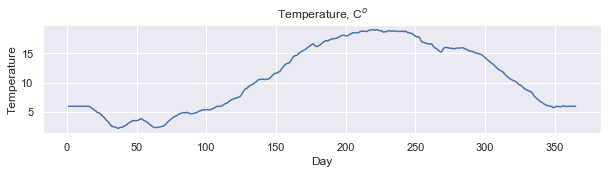

In [6]:
plt.plot(ox, temperature); plt.gcf().set_size_inches(10, 2);
plt.title('Temperature, C$^{o}$'); plt.xlabel('Day'); plt.ylabel('Temperature');

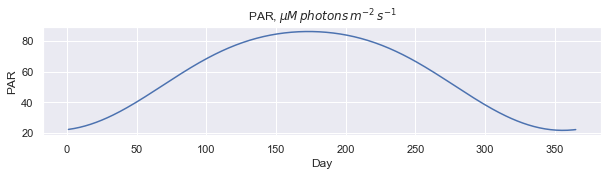

In [7]:
plt.plot(ox, par); plt.gcf().set_size_inches(10, 2);
plt.title('PAR, $\mu M\,photons\,m^{−2}\,s^{−1}$'); plt.xlabel('Day'); plt.ylabel('PAR');

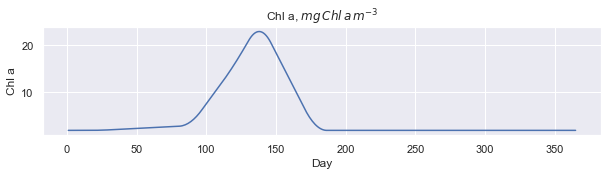

In [8]:
plt.plot(ox, chl_a); plt.gcf().set_size_inches(10, 2);
plt.title('Chl a, $mg\,Chl\,a\,m^{-3}$'); plt.xlabel('Day'); plt.ylabel('Chl a');

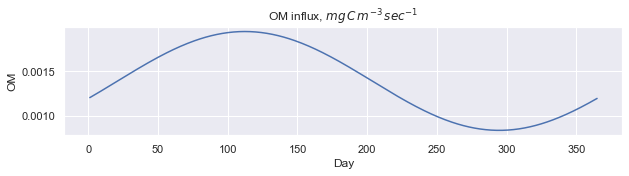

In [9]:
plt.plot(ox, om_flux); plt.gcf().set_size_inches(10, 2);
plt.title('OM influx, $mg\,C\,m^{-3}\,sec^{-1}$'); plt.xlabel('Day'); plt.ylabel('OM');

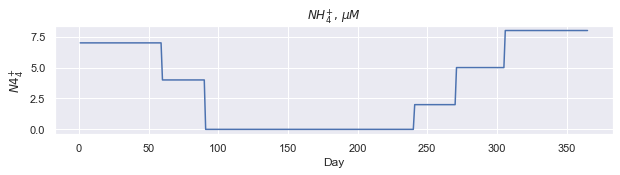

In [10]:
plt.plot(ox, ammonium); plt.gcf().set_size_inches(10, 2);
plt.title('$NH_{4}^{+},\,\mu M$'); plt.xlabel('Day'); plt.ylabel('$N4_{4}^{+}$');

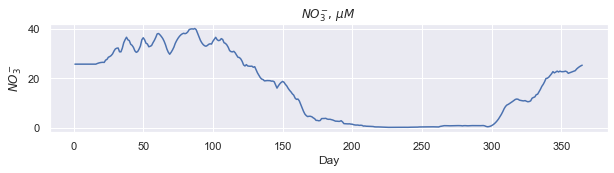

In [11]:
plt.plot(ox, no3); plt.gcf().set_size_inches(10, 2);
plt.title('$NO_{3}^{-},\,\mu M$'); plt.xlabel('Day'); plt.ylabel('$NO_{3}^{-}$');

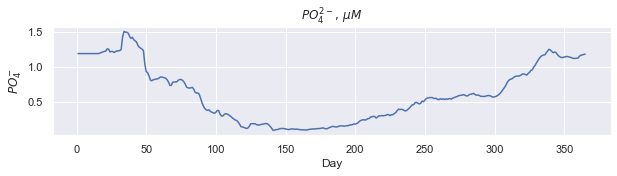

In [12]:
plt.plot(ox, po4); plt.gcf().set_size_inches(10, 2);
plt.title('$PO_{4}^{2-},\,\mu M$'); plt.xlabel('Day'); plt.ylabel('$PO_{4}^{-}$');

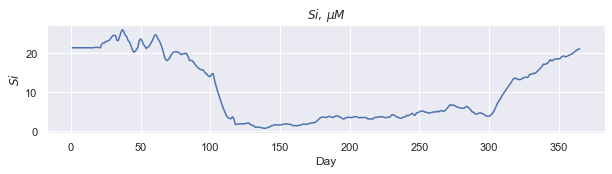

In [13]:
plt.plot(ox, si); plt.gcf().set_size_inches(10, 2);
plt.title('$Si,\,\mu M$'); plt.xlabel('Day'); plt.ylabel('$Si$');